In [12]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = "Arial"
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.set_color_codes("muted")


import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import folium
from folium.plugins import HeatMap

from collections import Counter
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p
import statsmodels
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_column",500)

In [53]:
#Detailed Listings data for New York City
lists_LA=pd.read_csv('listings_LA.csv')
lists_LA.head()

id                        listing_url       scrape_id last_scraped  \
0   109   https://www.airbnb.com/rooms/109  20200213032707   2020-02-13   
1   344   https://www.airbnb.com/rooms/344  20200213032707   2020-02-13   
2  2708  https://www.airbnb.com/rooms/2708  20200213032707   2020-02-13   
3  2732  https://www.airbnb.com/rooms/2732  20200213032707   2020-02-13   
4  2864  https://www.airbnb.com/rooms/2864  20200213032707   2020-02-13   

                                                name  \
0  Amazing bright elegant condo park front *UPGRA...   
1                  Family perfect;Pool;Near Studios!   
2  Mirrored Mini-Suite with Fireplace - W. Hollywood   
3                              Zen Life at the Beach   
4  *Upscale Professional Home with Beautiful Studio*   

                                             summary  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  This home is perfect for families; aspiring ch...   
2  Our best memory foam pillows you'll ever sleep...   
3                                                NaN   
4  Centrally located.... Furnished with 42 inch S...   

                                               space  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  Cheerful & comfortable; near studios, amusemen...   
2  Flickering fireplace.  Blendtec® Designer 625 ...   
3  This is a three story townhouse with the follo...   
4  The space is furnished with Thomasville furnit...   

                                         description experiences_offered  \
0  *** Unit upgraded with new bamboo flooring, br...                none   
1  This home is perfect for families; aspiring ch...                none   
2  Our best memory foam pillows you'll ever sleep...                none   
3  This is a three story townhouse with the follo...                none   
4  Centrally located.... Furnished with 42 inch S...                none   

                               neighborhood_overview  \
0                                                NaN   
1  Quiet-yet-close to all the fun in LA! Hollywoo...   
2  We are minutes away from the Mentor Language I...   
3                                                NaN   
4  What makes the neighborhood unique is that the...   

                                               notes  \
0                                                NaN   
1  One dog may be on premises, friendly and cared...   
2  Blendtec® Designer 625 Blender Bundle with Twi...   
3                                                NaN   
4  If you are doing business travel, this studio ...   

                                             transit  \
0                                                NaN   
1  Short drive to subway and elevated trains runn...   
2  There are many buses; bus stops going in every...   
3                                                NaN   
4  Public transportation is a 3 minutes walk to t...   

                                              access  \
0                                                NaN   
1  Pool, patio and self-contained main house all ...   
2  Kitchen with new refrigerator, dishwasher, sto...   
3                                                NaN   
4  Good access to all things in Los Angeles and O...   

                                         interaction  \
0                                                NaN   
1  Host and caretaker may be available throughout...   
2  I am friendly and available to help you with y...   
3                                                NaN   
4  I am always available for questions throughout...   

                                         house_rules  thumbnail_url  \
0  Camelot NEW RESIDENTS’ GENERAL INFORMATION   F...            NaN   
1  Host asks that guests refrain from partying lo...            NaN   
2  I just have one rule. The Golden Rule Do unto ...            NaN   
3  ABOUT YOU.  Friendly travelers or people comin...            NaN   
4                                             

In [55]:
lists_LA.summary

0        *** Unit upgraded with new bamboo flooring, br...
1        This home is perfect for families; aspiring ch...
2        Our best memory foam pillows you'll ever sleep...
3                                                      NaN
4        Centrally located.... Furnished with 42 inch S...
                               ...                        
38846    NOTE - The lobby is being renovated.  This doe...
38847    Unwind in this beautifully designed studio tha...
38848    Beautiful 2 Bedroom & 1.5 Bathroom condo in a ...
38849                                                  NaN
38850    Spacious and fully equipped 1 bedroom and 1 ba...
Name: summary, Length: 38851, dtype: object

In [50]:
lists_LA['last_scraped'].unique()

array(['2020-02-13'], dtype=object)

In [15]:
#columns_to_keep = ['id','name','summary','longitude','latitude','space','description','instant_bookable',
          # 'neighborhood_overview','neighbourhood_cleansed','neighbourhood_group_cleansed','host_id','host_name','host_since',
          # 'host_response_time','review_scores_rating','property_type','room_type',
          # 'accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities',
          # 'cancellation_policy','number_of_reviews','square_feet','guests_included','price']
        
#categorical
categorical_features = ['property_type','room_type','bed_type','host_since','host_response_time',
                        'neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','cancellation_policy'
                       ]

#numerical 
numberical_features = ['price','id','host_id','latitude','longitude','bathrooms','bedrooms','beds',
                       'guests_included','minimum_nights','availability_30','availability_60','availability_90','availability_365',
                       'number_of_reviews','calculated_host_listings_count_entire_homes','reviews_per_month'
                      ]

In [16]:
#lists.describe(include=["object"])

In [17]:
#lists.describe()

In [18]:
#lists.info(verbose=True, null_counts=True)

In [19]:
lists_LA = lists_LA[categorical_features+numberical_features]

In [20]:
lists_LA.head()

property_type        room_type       bed_type  host_since  \
0   Condominium  Entire home/apt       Real Bed  2008-06-27   
1         House  Entire home/apt       Real Bed  2008-07-11   
2     Apartment     Private room       Real Bed  2008-09-16   
3     Apartment     Private room  Pull-out Sofa  2008-09-17   
4     Apartment  Entire home/apt       Real Bed  2008-09-25   

  host_response_time neighbourhood_cleansed neighbourhood_group_cleansed  \
0                NaN            Culver City                 Other Cities   
1       within a day                Burbank                 Other Cities   
2     within an hour              Hollywood          City of Los Angeles   
3     within an hour           Santa Monica                 Other Cities   
4                NaN             Bellflower                 Other Cities   

                                           amenities  \
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
1  {Internet,Wifi,"Air conditioning",Pool,Kitchen...   
2  {Internet,Wifi,"Air conditioning","Wheelchair ...   
3  {Internet,Wifi,Kitchen,Heating,Washer,Dryer,"S...   
4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   

           cancellation_policy    price    id  host_id  latitude  longitude  \
0  strict_14_with_grace_period  $122.00   109      521  33.98209 -118.38494   
1                     flexible  $168.00   344      767  34.16562 -118.33458   
2  strict_14_with_grace_period   $79.00  2708     3008  34.09768 -118.34602   
3  strict_14_with_grace_period  $140.00  2732     3041  34.00475 -118.48127   
4  strict_14_with_grace_period   $80.00  2864     3207  33.87619 -118.11397   

   bathrooms  bedrooms  beds  guests_included  minimum_nights  \
0        2.0       2.0   3.0                3              30   
1        1.0       3.0   3.0                6               2   
2        1.5       1.0   1.0                1              30   
3        1.0       1.0   1.0                1               1   
4        1.0       1.0   1.0                1               2   

   availability_30  availability_60  availability_90  availability_365  \
0                0                0                0                 0   
1                0                0                0               119   
2                2                2               29               304   
3                2               32               62               337   
4                0                0                0                 0   

   number_of_reviews  calculated_host_listings_count_entire_homes  \
0                  2                                            1   
1                  8                                            1   
2                 23                                            0   
3                 21                                            1   
4                  0                                            1   

   reviews_per_month  
0               0.02  
1               0.18  
2               0.33  
3               0.20  
4                NaN

In [21]:
lists_LA.shape

(38851, 26)

# 1. Data Preprocessing

In [23]:
#missing values
total = lists_LA.isnull().sum().sort_values(ascending=False)
percent = (lists_LA.isnull().sum())/lists_LA.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(106)

Total   Percent
host_response_time                            8678  0.223366
reviews_per_month                             7680  0.197678
beds                                           268  0.006898
bedrooms                                        71  0.001827
bathrooms                                       21  0.000541
host_since                                       2  0.000051
calculated_host_listings_count_entire_homes      0  0.000000
number_of_reviews                                0  0.000000
availability_365                                 0  0.000000
availability_90                                  0  0.000000
availability_60                                  0  0.000000
availability_30                                  0  0.000000
minimum_nights                                   0  0.000000
guests_included                                  0  0.000000
longitude                                        0  0.000000
price                                            0  0.000000
host_id                                          0  0.000000
latitude                                         0  0.000000
cancellation_policy                              0  0.000000
amenities                                        0  0.000000
neighbourhood_group_cleansed                     0  0.000000
neighbourhood_cleansed                           0  0.000000
bed_type                                         0  0.000000
room_type                                        0  0.000000
id                                               0  0.000000
property_type                                    0  0.000000

In [24]:
# replacing NaN values with 0
lists_LA['price'] = lists_LA['price'].apply(lambda x: x.replace('$','').replace(',',''))
lists_LA['price'] = lists_LA['price'].astype(float)
lists_LA.fillna(0, inplace=True)
lists_LA.rename(columns={'neighbourhood_group_cleansed':'borough',
                     'neighbourhood_cleansed':'neighbourhood'},inplace = True)

In [25]:
lists_LA.head()

property_type        room_type       bed_type  host_since  \
0   Condominium  Entire home/apt       Real Bed  2008-06-27   
1         House  Entire home/apt       Real Bed  2008-07-11   
2     Apartment     Private room       Real Bed  2008-09-16   
3     Apartment     Private room  Pull-out Sofa  2008-09-17   
4     Apartment  Entire home/apt       Real Bed  2008-09-25   

  host_response_time neighbourhood              borough  \
0                  0   Culver City         Other Cities   
1       within a day       Burbank         Other Cities   
2     within an hour     Hollywood  City of Los Angeles   
3     within an hour  Santa Monica         Other Cities   
4                  0    Bellflower         Other Cities   

                                           amenities  \
0  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   
1  {Internet,Wifi,"Air conditioning",Pool,Kitchen...   
2  {Internet,Wifi,"Air conditioning","Wheelchair ...   
3  {Internet,Wifi,Kitchen,Heating,Washer,Dryer,"S...   
4  {TV,"Cable TV",Internet,Wifi,"Air conditioning...   

           cancellation_policy  price    id  host_id  latitude  longitude  \
0  strict_14_with_grace_period  122.0   109      521  33.98209 -118.38494   
1                     flexible  168.0   344      767  34.16562 -118.33458   
2  strict_14_with_grace_period   79.0  2708     3008  34.09768 -118.34602   
3  strict_14_with_grace_period  140.0  2732     3041  34.00475 -118.48127   
4  strict_14_with_grace_period   80.0  2864     3207  33.87619 -118.11397   

   bathrooms  bedrooms  beds  guests_included  minimum_nights  \
0        2.0       2.0   3.0                3              30   
1        1.0       3.0   3.0                6               2   
2        1.5       1.0   1.0                1              30   
3        1.0       1.0   1.0                1               1   
4        1.0       1.0   1.0                1               2   

   availability_30  availability_60  availability_90  availability_365  \
0                0                0                0                 0   
1                0                0                0               119   
2                2                2               29               304   
3                2               32               62               337   
4                0                0                0                 0   

   number_of_reviews  calculated_host_listings_count_entire_homes  \
0                  2                                            1   
1                  8                                            1   
2                 23                                            0   
3                 21                                            1   
4                  0                                            1   

   reviews_per_month  
0               0.02  
1               0.18  
2               0.33  
3               0.20  
4               0.00

# EDA

###  1.Most popular Airbnb locations in NYC
 * Manhattan has the most number of listings
 * On top 5 neighbourhoods,three(bedford stuyvesant/Williamsburg/Bushwick) are from Brooklyn, two(Harlem/Hell's kitchen) are from Manhattan
 * There are some extreme high prices in Manhattam

Text(-6.949999999999996, 0.5, 'Number of listings')

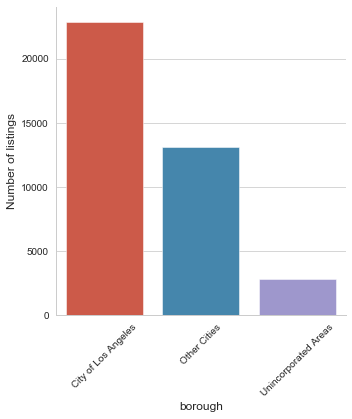

In [26]:
# The number of listings by borough
number_list_borough = lists_LA.groupby('borough').id.count().reset_index().sort_values(by='id', ascending=False).head(5)
sns.catplot(x="borough", y="id", kind="bar", data=number_list_borough,ci=None)
plt.xticks(rotation=45)
plt.ylabel('borough')
plt.ylabel('Number of listings')

Text(-1.5749999999999957, 0.5, 'Number of listings')

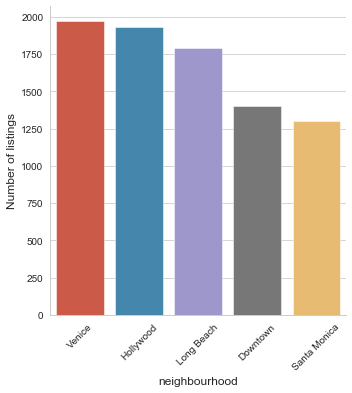

In [27]:
#TOP 5 neighbourhood with most listings
number_list_borough = lists_LA.groupby('neighbourhood').id.count().reset_index().sort_values(by='id', ascending=False).head(5)
sns.catplot(x="neighbourhood", y="id", kind="bar", data=number_list_borough,ci=None)
plt.xticks(rotation=45)
plt.ylabel('neighbourhood')
plt.ylabel('Number of listings')

In [52]:
number_list_borough.sum()

neighbourhood    VeniceHollywoodLong BeachDowntownSanta Monica
id                                                        8396
dtype: object

In [28]:
# Listings Geo information with price
Price=lists_LA.groupby(['latitude','longitude'])['price'].mean().reset_index()

fig = px.scatter_mapbox(Price, 
                        lat="latitude", lon="longitude",size="price",size_max=12,
                        color="price", color_continuous_scale=px.colors.sequential.Inferno, zoom=11)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### 2.AirBnB Type  in NYC

 * Entire home/apt and Private room are the most common room type
 * Apartment is the most property type
 * Most are real beds

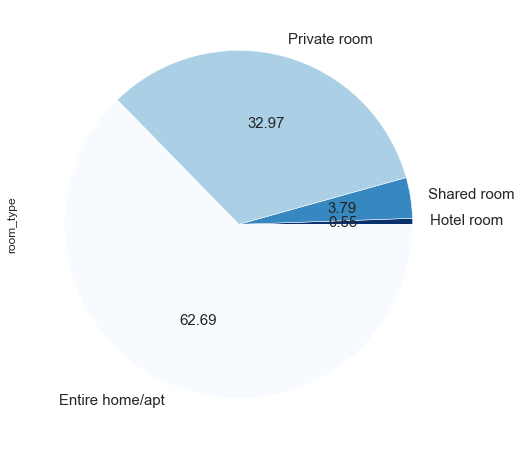

In [29]:
room_df = pd.DataFrame.from_dict(Counter(lists_LA.room_type), orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(8,8), 
                 fontsize = 15, autopct = '%.2f',
                 legend = False)

In [30]:
number_list_property_type = lists_LA.groupby('property_type').id.count().reset_index().rename(columns ={'id':'number of listings'}).sort_values(by='number of listings', ascending=False)

In [31]:
number_list_property_type

property_type  number of listings
25                   House               13745
1                Apartment               12944
15             Condominium                2416
22              Guesthouse                2153
21             Guest suite                1501
39               Townhouse                1219
6                 Bungalow                1016
43                   Villa                 981
29                    Loft                 748
35      Serviced apartment                 515
5           Boutique hotel                 271
23                  Hostel                 182
16                 Cottage                 178
0               Aparthotel                 168
9                Camper/RV                 154
3        Bed and breakfast                 130
37              Tiny house                  95
32                   Other                  92
24                   Hotel                  67
8                    Cabin                  63
20               Farm stay                  34
19             Earth house                  22
12                  Castle                  21
4                     Boat                  20
17              Dome house                  17
10                Campsite                  15
41               Treehouse                  12
2                     Barn                  10
36                    Tent                  10
14                  Chalet                   9
44                    Yurt                   7
18                    Dorm                   7
38                    Tipi                   6
13                    Cave                   4
26                     Hut                   4
34                  Resort                   2
28                  Island                   2
40                   Train                   2
11  Casa particular (Cuba)                   2
42           Vacation home                   2
31            Nature lodge                   1
30          Minsu (Taiwan)                   1
33   Pension (South Korea)                   1
27                   Igloo                   1
7                      Bus                   1

In [32]:
number_list_bedtype = lists_LA.groupby('bed_type').id.count().reset_index().rename(columns ={'id':'number of listings'}).sort_values(by='number of listings', ascending=False)
number_list_bedtype

bed_type  number of listings
4       Real Bed               38491
2          Futon                 143
3  Pull-out Sofa                  87
0         Airbed                  73
1          Couch                  57

In [33]:
from nltk.corpus import stopwords
import string
import nltk
import re
from wordcloud import WordCloud, STOPWORDS

In [34]:
amenitiesDF = lists_LA[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

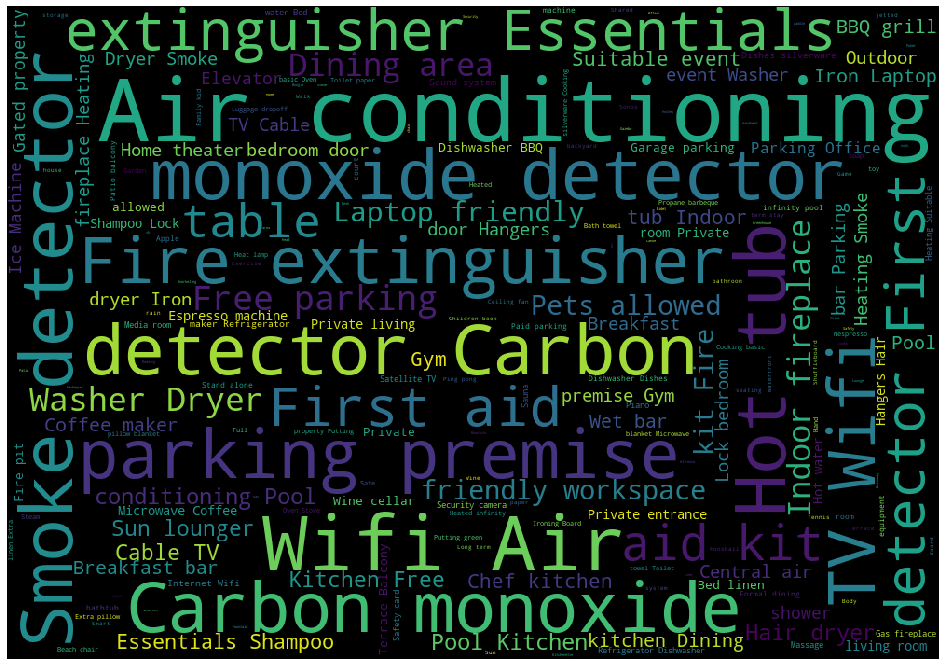

In [35]:
wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 3.  Differences in listings Price

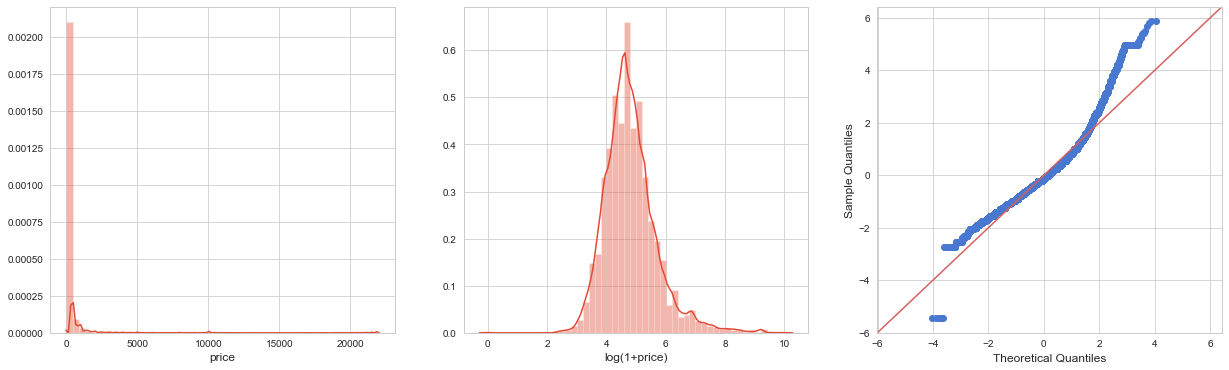

In [36]:
fig, axes = plt.subplots(1,3, figsize=(21,6))
sns.distplot(lists_LA['price'], ax=axes[0])
sns.distplot(np.log1p(lists_LA['price']), ax=axes[1])
axes[1].set_xlabel('log(1+price)')
sm.qqplot(np.log1p(lists_LA['price']), stats.norm, fit=True, line='45', ax=axes[2]);

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

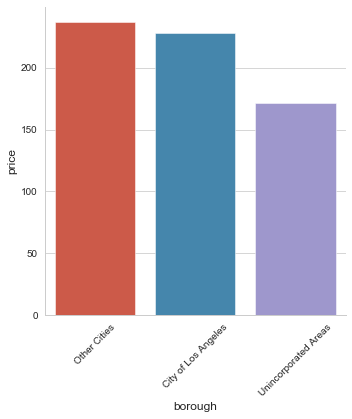

In [37]:
#average price per borough
sns.catplot(x="borough", y="price", kind="bar", data=lists_LA,ci=None)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

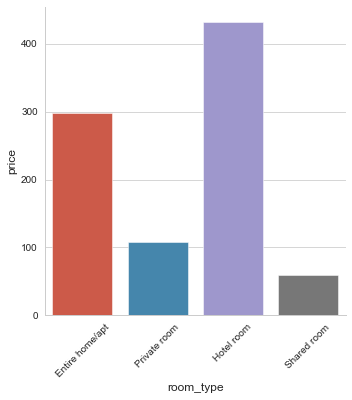

In [38]:
##average price per room_type
sns.catplot(x="room_type", y="price", kind="bar",data=lists_LA,ci=None)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

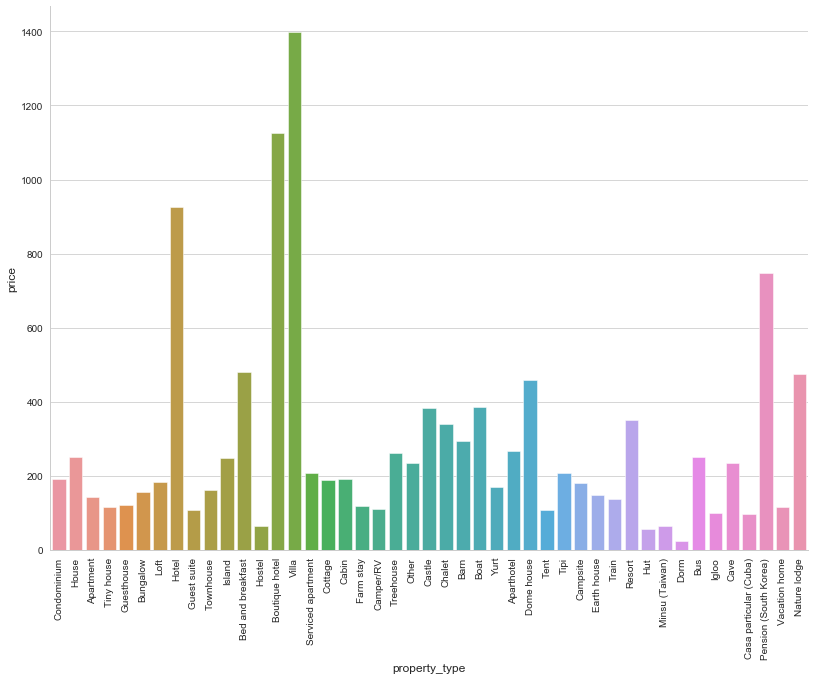

In [39]:
#average price for property type
sns.catplot(x="property_type", y="price", kind="bar",data=lists_LA,ci=None,height=8.27, aspect=11.7/8.27)
plt.xticks(rotation=90)

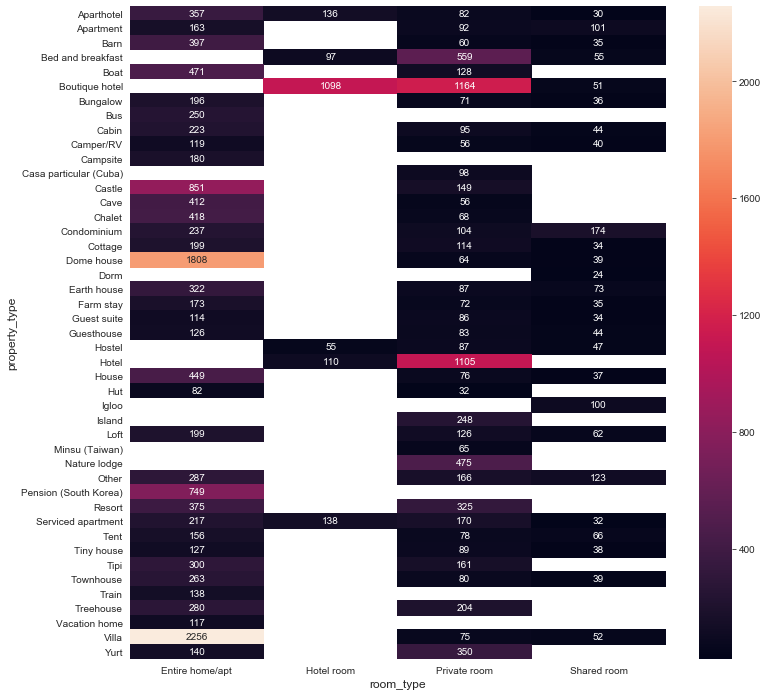

In [40]:
# HeatMap for variation of prices with number of bedrooms for listings
plt.figure(figsize=(12,12))
sns.heatmap(lists_LA.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

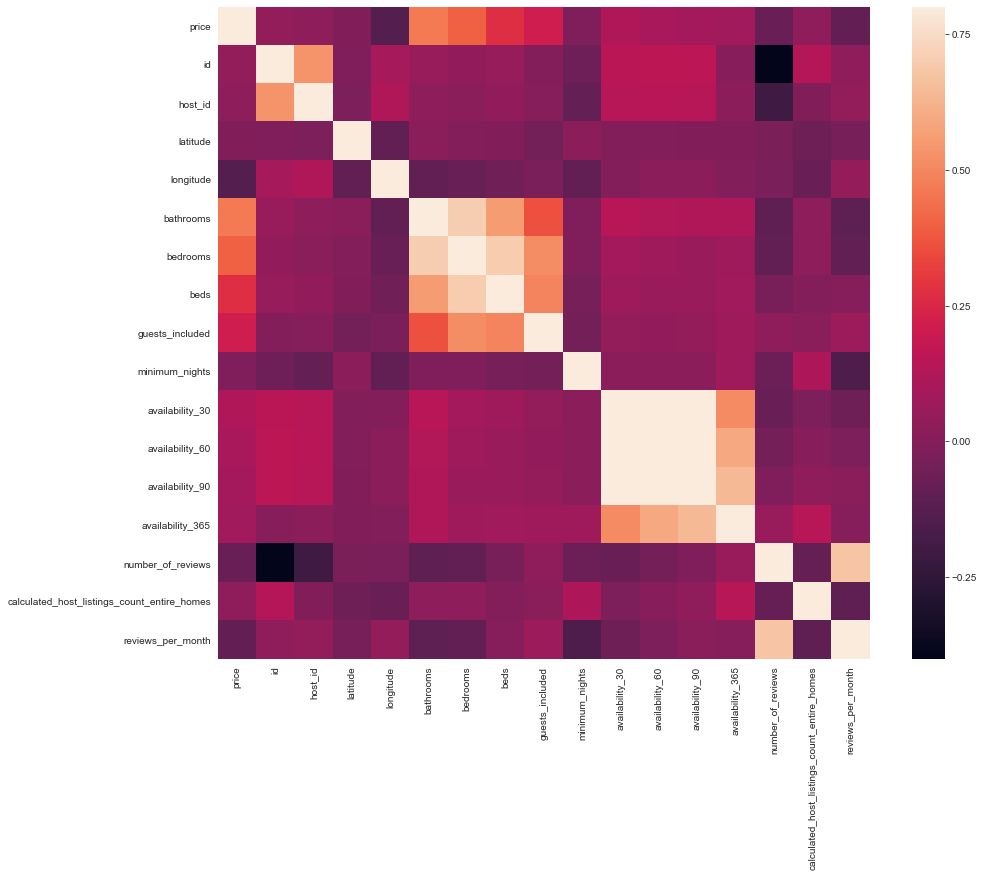

In [41]:
corrmatrix = lists_LA.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmatrix, vmax=0.8, square=True)
sns.set(font_scale=0.8)

In [42]:
#categorical
categorical_features = ['property_type','room_type','bed_type','host_since','host_response_time',
                        'neighbourhood_cleansed','neighbourhood_group_cleansed','amenities','cancellation_policy'
                       ]

#numerical 
numberical_features = ['price','id','host_id','latitude','longitude','bathrooms','bedrooms','beds',
                       'guests_included','minimum_nights','availability_30','availability_60','availability_90','availability_365',
                       'number_of_reviews','calculated_host_listings_count_entire_homes','reviews_per_month'
                      ]

# Model

In [43]:
from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample
from xgboost import XGBRegressor

In [44]:
categorical_features = lists_LA.select_dtypes(include=['object'])
print('Categorical features: {}'.format(categorical_features.shape))

Categorical features: (38851, 9)
